In [26]:
# основные библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# для кластеризации
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# для 3D визуализации
import plotly as py
import plotly.graph_objs as go

# загружаем файл с нашими данными и показываем первые пять строк для проверки
df = pd.read_csv('clustering_test_work.csv')
df.head()

,Unnamed: 0,actual_id,period_end,num,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,ratio_not_dh,ratio_online,ratio_refund,avg_ratio_purchase,quantity_1st_period,unigenders,recency,aov
0,0,12013601421,2021-02-19,2,17920.0,4,1,0,1.0,1.0,0.0,0.8,4.0,1,123,17920.0
1,1,12013601421,2021-04-19,3,17920.0,4,1,0,1.0,1.0,0.0,0.8,4.0,1,182,17920.0
2,2,12013601421,2021-06-19,4,17920.0,4,1,0,1.0,1.0,0.0,0.8,4.0,1,243,17920.0
3,3,12013601421,2021-08-19,5,17920.0,4,1,0,1.0,1.0,0.0,0.8,4.0,1,304,17920.0
4,4,12013601421,2021-10-19,6,17920.0,4,1,0,1.0,1.0,0.0,0.8,4.0,1,365,17920.0


In [16]:
# вычисляем основные статистические данные 
df.describe()

,Unnamed: 0,actual_id,num,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,ratio_not_dh,ratio_online,ratio_refund,avg_ratio_purchase,quantity_1st_period,unigenders,recency,aov
count,2.247574e+06,2.247574e+06,2.247574e+06,2.247574e+06,2.247574e+06,2.247574e+06,2.247574e+06,2.247574e+06,2.247574e+06,2.247574e+06,2.247574e+06,2.247574e+06,2.247574e+06,2.247574e+06,2.247574e+06
mean,1.123786e+06,2.743856e+13,6.089290e+00,3.099290e+04,3.321365e+00,2.006601e+00,1.232200e-01,7.761333e-01,2.389008e-01,3.704832e-02,9.649268e-01,2.289252e+00,1.038383e+00,2.396081e+02,1.187220e+04
std,6.488189e+05,9.871432e+15,3.164263e+00,6.037296e+04,6.016230e+00,3.069162e+00,6.905141e-01,4.014436e-01,3.838896e-01,1.554406e-01,1.458924e-01,2.412920e+00,1.921185e-01,1.791003e+02,1.202568e+04
min,0.000000e+00,6.380000e+02,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,5.618932e+05,7.912462e+10,3.000000e+00,3.980000e+03,1.000000e+00,1.000000e+00,0.000000e+00,8.341633e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.140000e+02,3.480000e+03
50%,1.123786e+06,7.919928e+10,6.000000e+00,1.398000e+04,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.840000e+02,9.980000e+03
75%,1.685680e+06,7.950406e+10,8.000000e+00,3.492000e+04,4.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,5.000000e-01,0.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,3.630000e+02,1.624150e+04
max,2.247573e+06,4.415340e+18,1.400000e+01,7.365842e+06,6.290000e+02,2.810000e+02,1.260000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.380000e+02,2.000000e+00,8.270000e+02,4.307900e+05


In [8]:
# проверяем есть ли пустые ячейки
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247574 entries, 0 to 2247573
Data columns (total 16 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Unnamed: 0           int64  
 1   actual_id            int64  
 2   period_end           object 
 3   num                  int64  
 4   revenue_lastyear     float64
 5   quantity_lastyear    int64  
 6   orders_lastyear      int64  
 7   orders_refund        int64  
 8   ratio_not_dh         float64
 9   ratio_online         float64
 10  ratio_refund         float64
 11  avg_ratio_purchase   float64
 12  quantity_1st_period  float64
 13  unigenders           int64  
 14  recency              int64  
 15  aov                  float64
dtypes: float64(7), int64(8), object(1)
memory usage: 274.4+ MB


C:\Users\PCHelper\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num', ylabel='Density'>

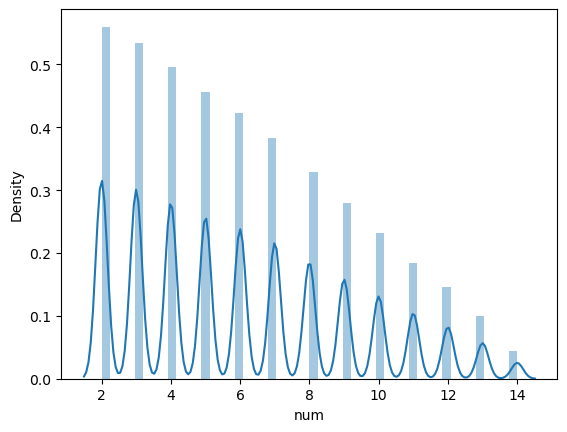

In [12]:
sns.distplot(df["num"])

C:\Users\PCHelper\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revenue_lastyear', ylabel='Density'>

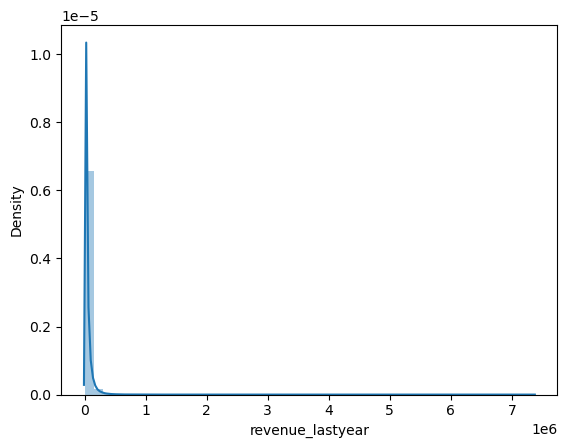

In [15]:
sns.distplot(df["revenue_lastyear"])

C:\Users\PCHelper\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='aov', ylabel='Density'>

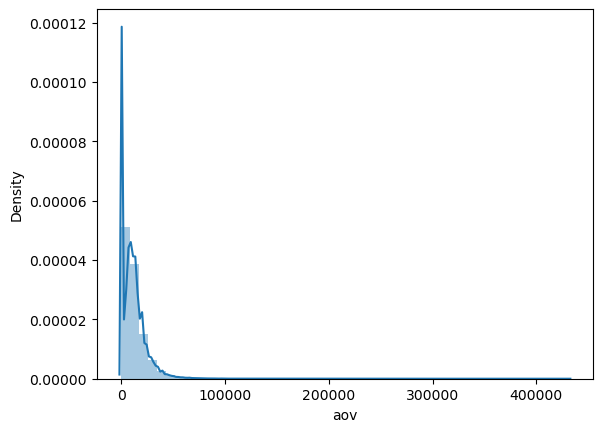

In [19]:
sns.distplot(df["aov"])

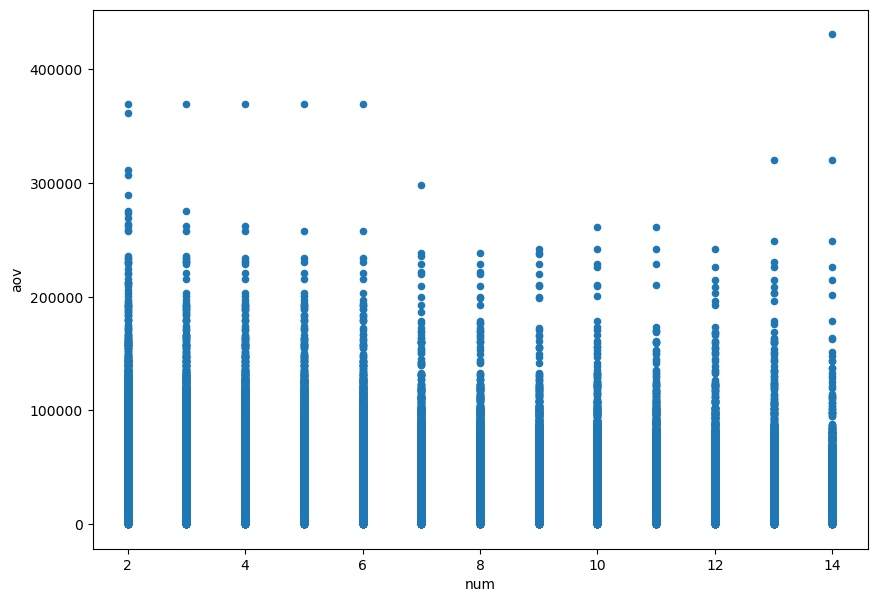

In [27]:
# берем два параметра num (число месяцев жизни) и aov (Средний чек по выкупленным заказам ) и по ним строим линейную регрессию
df1 = df[["num", "aov"]]

df1.plot(kind="scatter",
        x="num",
        y="aov",
        figsize=(10, 7))
plt.show()

In [31]:
sum_of_sqr_dist = {}

for k in range(1, 10):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km = km.fit(df1)
    sum_of_sqr_dist[k] = km.inertia_

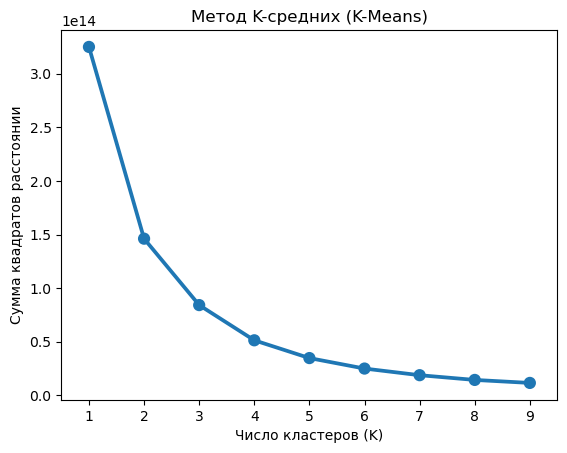

In [32]:
sns.pointplot(x=list(sum_of_sqr_dist.keys()), y=list(sum_of_sqr_dist.values()))
plt.xlabel("Число кластеров (K)")
plt.ylabel("Сумма квадратов расстоянии")
plt.title("Метод K-средних (K-Means)")
plt.show()

In [34]:
# видим что начиная с 4го кластера график начинает убывать не так стремительно и по этой причине число кластеров будем брать 4
Model = KMeans(n_clusters=4,
             init='k-means++',
             max_iter=1000)
Model.fit(df1)

KMeans(max_iter=1000, n_clusters=4)

In [35]:
print("Labels", Model.labels_)

Labels [3 3 3 ... 3 3 3]


In [36]:
print("Centroids", Model.cluster_centers_)

Centroids [[5.31877590e+00 3.02261470e+04]
 [7.03627113e+00 2.88182303e+03]
 [5.28328076e+00 6.97814891e+04]
 [5.38789482e+00 1.37719762e+04]]


In [38]:
centroids = Model.cluster_centers_

In [39]:
df1_cluster = df1.copy()
df1_cluster["Cluster"] = Model.fit_predict(df1)

In [40]:
df1_cluster.head()

,num,aov,Cluster
0,2,17920.0,0
1,3,17920.0,0
2,4,17920.0,0
3,5,17920.0,0
4,6,17920.0,0


In [41]:
Color = ['red', 'blue', 'black', 'yellow']
df1_cluster['Color'] = df1_cluster['Cluster'].map(lambda p:Color[p])

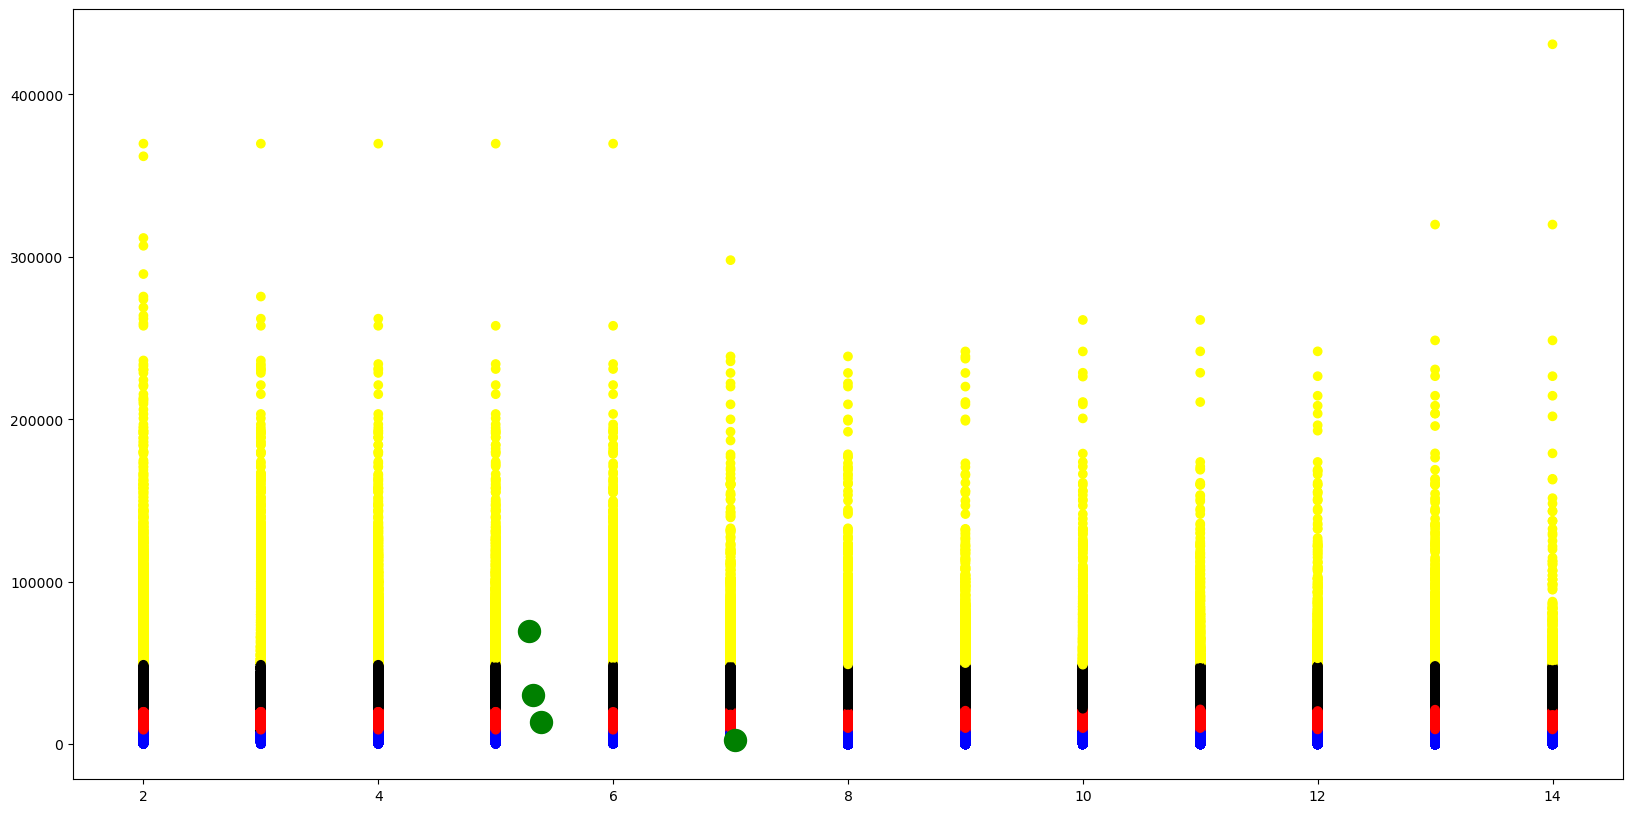

In [42]:
plt.figure(figsize=(20, 10))
plt.scatter(df1["num"],
           df1["aov"],
           c=df1_cluster["Color"])

plt.scatter(centroids[:, 0], centroids[:, 1], c='green', s=250)
plt.show()